In [1]:
import os
import cv2
import random

from glob import glob
from evaluate import load
from natsort import natsorted
from pathlib import Path

from BDRC.inference import OCRInference
from BDRC.label_encoder import WylieEncoder
from BDRC.utils import get_kenlm_config, read_ocr_model_config, show_image

/Users/eric/Desktop/Projects/Python/ocr-inference/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# KenLM models
kenlm_wylie_5gram = "Models/KenLM/tibetan_5gram.binary"
kenlm_wlyie_5gram_arpa = "Models/KenLM/tibetan_5gram.arpa"

kenlm_wylie_6gram = "Models/KenLM/tib_wylie_char_6gram.binary"
kenlm_wlyie_6gram_arpa = "Models/KenLM/tib_wylie_char_6gram.arpa"

kenlm_config_5g = get_kenlm_config(kenlm_wylie_5gram, kenlm_wlyie_5gram_arpa)
kenlm_config_6g = get_kenlm_config(kenlm_wylie_6gram, kenlm_wlyie_6gram_arpa)

In [3]:
# Easter2-Vit
woodblock_vit_config_file = "Models/BDRC/Woodblock-Vit/2025_12_18_22_52/config.json"
woodblock_vit_model_config = read_ocr_model_config(woodblock_vit_config_file)
wooblock_vit_label_encoder = WylieEncoder(woodblock_vit_model_config.charset)
woodblock_vit_inference = OCRInference(woodblock_vit_model_config, kenlm_config_5g)

Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Only 75 unigrams passed as vocabulary. Is this small or artificial data?


Available ONNX providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']


In [4]:
# KenLM models
kenlm_wylie_5gram = "Models/KenLM/tibetan_5gram.binary"
kenlm_wlyie_5gram_arpa = "Models/KenLM/tibetan_5gram.arpa"

kenlm_wylie_6gram = "Models/KenLM/tib_wylie_char_6gram.binary"
kenlm_wlyie_6gram_arpa = "Models/KenLM/tib_wylie_char_6gram.arpa"

kenlm_config_5g = get_kenlm_config(kenlm_wylie_5gram, kenlm_wlyie_5gram_arpa)
kenlm_config_6g = get_kenlm_config(kenlm_wylie_6gram, kenlm_wlyie_6gram_arpa)

# Vanilla Easter2
woodblock_config_file = "Models/BDRC/Woodblock/model_config.json"
woodblock_model_config = read_ocr_model_config(woodblock_config_file)
wooblock_label_encoder = WylieEncoder(woodblock_model_config.charset)
woodblock_inference = OCRInference(woodblock_model_config, kenlm_config_5g)


# Easter2b (fixed convolutions)
woodblock2b_config_file = "Models/BDRC/Woodblock-Easter2b/2026_1_12_6_10/config.json"
woodblock2b_model_config = read_ocr_model_config(woodblock2b_config_file)
wooblock2b_label_encoder = WylieEncoder(woodblock2b_model_config.charset)
woodblock2b_inference = OCRInference(woodblock2b_model_config, kenlm_config_5g)


# Easter2-Attention
woodblock_att_config_file = "Models/BDRC/Woodblock-Easter2Attention/2026_1_11_9_32/config.json"
woodblock_att_model_config = read_ocr_model_config(woodblock_att_config_file)
wooblock_att_label_encoder = WylieEncoder(woodblock_att_model_config.charset)
woodblock_att_inference = OCRInference(woodblock_att_model_config, kenlm_config_5g)


# Easter2-Vit
woodblock_vit_config_file = "Models/BDRC/Woodblock-Vit/2025_12_18_22_52/config.json"
woodblock_vit_model_config = read_ocr_model_config(woodblock_vit_config_file)
wooblock_vit_label_encoder = WylieEncoder(woodblock_vit_model_config.charset)
woodblock_vit_inference = OCRInference(woodblock_vit_model_config, kenlm_config_5g)

#ocr_model_config_file = "Models/BDRC/BigUCHAN_v1/config.json"

# cer scorer
cer_scorer = load("cer")

Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Only 75 unigrams passed as vocabulary. Is this small or artificial data?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Only 75 unigrams passed as vocabulary. Is this small or artificial data?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this

Available ONNX providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Available ONNX providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Available ONNX providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Available ONNX providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']


In [5]:
# read test distributions
data_root = Path("Datasets/datasets--BDRC--Uchan-OCR-EVAL/snapshots/ce992d6ceb88284b8a394b3bec1285bf6da48960")
test_dist = {}

for sub_dir in data_root.iterdir():

    if os.path.isdir(sub_dir):
        distr = sub_dir.name
        lines = natsorted(glob(f"{str(sub_dir)}/*.jpg"))
        labels = natsorted(glob(f"{str(sub_dir)}/*.txt"))

        test_dist[sub_dir.name] = {"images" : lines, "labels" : labels}

        print(f"{distr} => Images: {len(lines)}, Labels: {len(labels)}")

21320269 => Images: 6, Labels: 6
I1KG4010343 => Images: 7, Labels: 7
15520027 => Images: 5, Labels: 5
20880034 => Images: 6, Labels: 6
16290115 => Images: 6, Labels: 6
I0TTBBC0080_0010135 => Images: 7, Labels: 7
17410210 => Images: 6, Labels: 6
I0TTBBC0040_0010039 => Images: 6, Labels: 6
20430451 => Images: 6, Labels: 6
I1KG5910016 => Images: 6, Labels: 6
15520015 => Images: 4, Labels: 4
15740086 => Images: 6, Labels: 6


Images: 7, Labels: 7
4
GT-Label: gcig§kyang§ma§zhus§te//rgyal§ba'i§bstan§par§'byam§la//shes§pa'i§snang§ba§de§nas§thob//shes§rab§kyi§spyan§cig§gnang§ba§'dra//zhes§gsungs§pa§ltar§yin§no//bla§ma§bcos§min§gyis§m+so
Prediction: gcig§kyang§ma§zhus§te//rgyal§ba'i§bstan§pa§rab§'byam§la//shes§pa'i§snang§ba§de§nas§thob/shes§rab§kyi§span§cig§gnang§ba§'dra//zhes§gsungs§pa§ltar§yin§no//bla§ma§la§bcos§min§gyi§mro§
Cer Score: 0.06779661016949153


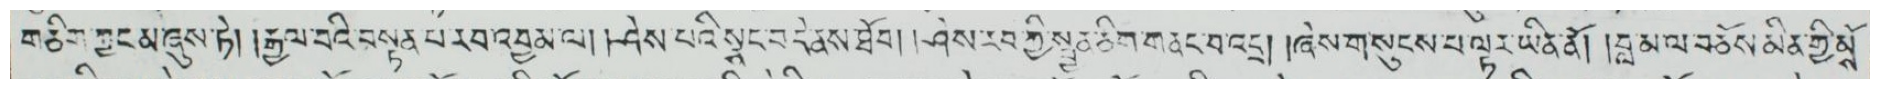

In [6]:
# single sample
test_set = "Datasets/datasets--BDRC--Uchan-OCR-EVAL/snapshots/ce992d6ceb88284b8a394b3bec1285bf6da48960/I0TTBBC0080_0010135"

lines = natsorted(glob(f"{str(test_set)}/*.jpg"))
labels = natsorted(glob(f"{str(test_set)}/*.txt"))
print(f"Images: {len(lines)}, Labels: {len(labels)}")

assert (len(lines) == len(labels))

sample_idx = random.randint(0, len(lines)-1)

print(sample_idx)
image_path = lines[sample_idx]
label_path = labels[sample_idx]

label = wooblock_vit_label_encoder.read_label(label_path)

img = cv2.imread(image_path)
ocr_result = woodblock_vit_inference.run(img)

cer_score = cer_scorer.compute(predictions=[ocr_result], references=[label])

show_image(img)
print(f"GT-Label: {label}")
print(f"Prediction: {ocr_result}")
print(f"Cer Score: {cer_score}")

#### Evaluator class

In [5]:
from BDRC.inference import OCREvaluator

In [ ]:
cer_scorer = load("cer")

vanilla_evaluator = OCREvaluator(woodblock_config_file, cer_scorer)
vanilla2b_evaluator = OCREvaluator(woodblock2b_config_file, cer_scorer)
vit_evaluator = OCREvaluator(woodblock_vit_config_file, cer_scorer)
att_evaluator = OCREvaluator(woodblock_att_config_file, cer_scorer)

evaluators = [vanilla_evaluator, vanilla2b_evaluator, vit_evaluator, att_evaluator]

In [ ]:
score_output_dir = "ScoresOutput"
data_root = Path("Datasets/datasets--BDRC--Uchan-OCR-EVAL/snapshots/ce992d6ceb88284b8a394b3bec1285bf6da48960")

all_eval_sets = []


for sub_dir in data_root.iterdir():

    if os.path.isdir(sub_dir):
        distr = sub_dir.name
        lines = natsorted(glob(f"{str(sub_dir)}/*.jpg"))
        labels = natsorted(glob(f"{str(sub_dir)}/*.txt"))
        print(f"{distr} => Images: {len(lines)}, Labels: {len(labels)}")
        
        for evaluator in evaluators:
            architecture_name = evaluator.get_architecture()
            result = evaluator.evaluate_distribution(distr, lines, labels)
            
            all_eval_sets.append(result)

            result_out = os.path.join(score_output_dir, distr)
            os.makedirs(result_out, exist_ok=True)

            score_out_file = f"{result_out}/{architecture_name}.txt"

            with open(score_out_file, "w") as f:
                for img_name, cer_score in result.cer_scores.items():
                    f.write(f"{img_name} : {cer_score}\n")